In [1]:
from lsst.analysis.tools.tasks.reconstructor import reconstructAnalysisTools
from lsst.daf.butler import Butler
from lsst.analysis.tools.interfaces._task import _StandinPlotInfo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
from sklearn import linear_model, datasets

Find the collection names at https://confluence.lsstcorp.org/display/LSSTCOM/AuxTel+Imaging+Survey+Data+Descriptions

In [2]:
repo = '/repo/embargo'
collection = 'LATISS/runs/AUXTEL_DRP_IMAGING_20230509_20240311/w_2024_10/PREOPS-4985'

butler = Butler(repo, collections=collection)
registry = butler.registry

### Which tracts have data?

In [3]:
nImage_refs = list(butler.registry.queryDatasets('deepCoadd_nImage'))

In [4]:
tracts = np.unique([ref.dataId['tract'] for ref in nImage_refs])
print(tracts)

bands = np.unique([ref.dataId['band'] for ref in nImage_refs])
print(bands)

[3864 5614 5615 5634]
['g' 'i' 'r' 'y' 'z']


In [5]:
# Check which tracts actually have a lot of visit coverage:
for tract in tracts:
    visits = list(butler.registry.queryDatasets('visitSummary', tract=tract, skymap='latiss_v1', findFirst=True))
    print(tract, len(visits))

3864 2680
5614 200
5615 692
5634 1140


In [6]:
mytract = 5634 # 3864
skymap = butler.get('skyMap', skymap='latiss_v1')
tract = skymap.generateTract(mytract)
sp2 = tract.getCtrCoord()
sp2

SpherePoint(270.8108108108108*degrees, -24.545454545454543*degrees)

In [7]:
mytract_did = {'tract': mytract, 'skymap': 'latiss_v1'}

In [8]:
taskState, inputData = reconstructAnalysisTools(butler,
                                                collection=collection,
                                                label="analyzeMatchedVisitCore",
                                                dataId=mytract_did, 
                                                callback=None
)

/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collection

In [9]:
inputData.keys()

dict_keys(['associatedSources', 'skyMap', 'sourceCatalogs'])

In [10]:
isolated_star_sources = inputData['associatedSources']

In [11]:
isolated_star_sources

,index,sourceId,visit,detector,ra,dec,physical_filter,band,apFlux_35_0_instFlux,apFlux_35_0_instFluxErr,x,y,apFlux_50_0_instFlux,apFlux_50_0_instFluxErr,apFlux_50_0_flag,localBackground_instFlux,localBackground_flag,source_row,obj_index
0,48,172087474703564849,2023052400662,0,270.197308,-24.994226,SDSSi_65mm~empty,i,51679.446627,1042.169036,2397.407401,150.309259,44129.556359,1467.919191,False,-1.533899,False,48,0
1,55,172087475777306680,2023052400663,0,270.197308,-24.994227,SDSSi_65mm~empty,i,60347.680892,1023.165507,2955.564602,143.732470,63660.380897,1440.841898,False,1.057012,False,55,0
2,25,172087481146015770,2023052400668,0,270.197308,-24.994228,SDSSi_65mm~empty,i,55099.658157,982.371553,3520.733211,138.185418,52565.725393,1381.312636,False,-0.736832,False,25,0
3,311,172087500473368888,2023052400686,0,270.197306,-24.994230,SDSSi_65mm~empty,i,60360.374678,1081.271330,186.548485,1286.471840,64011.372204,1526.448830,False,0.490496,False,311,0
4,288,173564931642229025,2023070500395,0,270.197303,-24.994232,SDSSi_65mm~empty,i,41877.517101,755.709879,2929.410502,2194.536365,44000.780196,1062.074143,False,0.516020,False,288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57913,56,174585390101954617,2023080300499,0,270.101396,-25.090426,SDSSg_65mm~empty,g,15660.957262,676.186812,466.539950,438.670898,21842.670203,962.469943,False,1.750056,False,56,2346
57914,204,173564887618814157,2023070500354,0,270.283904,-25.014576,SDSSg_65mm~empty,g,6686.484825,628.996493,2775.748365,2358.499246,7024.046075,894.404378,False,0.207766,False,204,2347
57915,263,175500106466853128,2023082900427,0,270.195572,-24.935159,SDSSg_65mm~empty,g,8811.821006,792.725524,2035.234008,2667.128220,9427.853357,1128.989052,False,0.019556,False,263,2348
57916,436,174585216155779509,2023080300337,0,270.103691,-25.071202,SDSSg_65mm~empty,g,18203.357767,541.734753,3470.665167,3085.460843,25916.453675,765.496025,False,0.645936,False,436,2349


In [12]:
sourcetab = pd.concat(inputData['sourceCatalogs'])

In [13]:
# sourcetab.columns

In [14]:
# colnames = ["sourceId", "psfFlux", "psfFluxErr", "psfFlux_flag", "psfFlux_apCorr", "psfFlux_apCorrErr",
colnames = ["psfFlux", "psfFluxErr", "psfFlux_flag", "psfFlux_apCorr", "psfFlux_apCorrErr",
            "extendedness", "detect_isPrimary", "deblend_skipped",
            "gaussianFlux", "gaussianFluxErr", "gaussianFlux_flag",
            "localPhotoCalib", "localPhotoCalibErr", "localPhotoCalib_flag"]

src_trim = sourcetab[colnames]
snr_cut = 50.0
src_trim = src_trim[(src_trim['psfFlux']/src_trim['psfFluxErr']) > snr_cut]
del sourcetab

In [15]:
src_trim

,psfFlux,psfFluxErr,psfFlux_flag,psfFlux_apCorr,psfFlux_apCorrErr,extendedness,detect_isPrimary,deblend_skipped,gaussianFlux,gaussianFluxErr,gaussianFlux_flag,localPhotoCalib,localPhotoCalibErr,localPhotoCalib_flag
sourceId,,,,,,,,,,,,,,
174022157754433541,5.601553e+07,283092.077017,False,1.018690,0.0,0.0,True,False,5.552098e+07,295655.600849,False,204.269755,0.909009,False
174022157754433546,7.226351e+06,74325.412195,False,1.028584,0.0,0.0,True,False,7.179185e+06,80881.713070,False,198.927978,0.909009,False
174022157754433560,7.143840e+06,74597.807392,False,1.048683,0.0,0.0,True,False,6.985391e+06,81684.913902,False,197.813308,0.909009,False
174022157754433567,9.345003e+07,463685.398029,False,1.054459,0.0,0.0,True,True,9.286590e+07,474470.004872,False,197.553407,0.909009,False
174022157754433569,6.638631e+07,337228.033142,False,1.023830,0.0,0.0,True,False,6.637754e+07,356029.935762,False,199.229521,0.909009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175500151564009987,1.467037e+06,13156.217195,False,0.999245,0.0,0.0,True,False,1.502045e+06,14576.095643,False,24.072932,0.064581,False
175500151564010015,1.532427e+06,13068.868778,False,1.043096,0.0,0.0,True,False,1.509523e+06,13510.554518,False,24.461493,0.064581,False
175500151564010032,5.515079e+05,10797.605945,False,1.053287,0.0,0.0,True,False,5.465671e+05,11189.652348,False,24.429196,0.064581,False


In [16]:
# join with the catalog with the associated matches
joined = pd.merge(isolated_star_sources[["sourceId", "obj_index", "band", "visit", "detector"]], src_trim, left_on="sourceId", right_index=True)

In [17]:
joined

,sourceId,obj_index,band,visit,detector,psfFlux,psfFluxErr,psfFlux_flag,psfFlux_apCorr,psfFlux_apCorrErr,extendedness,detect_isPrimary,deblend_skipped,gaussianFlux,gaussianFluxErr,gaussianFlux_flag,localPhotoCalib,localPhotoCalibErr,localPhotoCalib_flag
0,172087474703564849,0,i,2023052400662,0,1.314763e+06,9700.391986,False,0.927316,0.0,0.0,True,False,1.285888e+06,10838.142958,False,24.670162,0.053037,False
1,172087475777306680,0,i,2023052400663,0,1.497442e+06,10398.777212,False,1.099029,0.0,0.0,True,False,1.489605e+06,11955.987926,False,25.181026,0.030492,False
2,172087481146015770,0,i,2023052400668,0,1.645595e+06,12613.454212,False,1.156677,0.0,0.0,True,False,1.553542e+06,13455.300707,False,25.317476,0.062845,False
3,172087500473368888,0,i,2023052400686,0,1.330437e+06,10574.835167,False,0.982640,0.0,0.0,True,False,1.355594e+06,11762.533513,False,23.968285,0.037692,False
4,173564931642229025,0,i,2023070500395,0,1.332978e+06,14830.515991,False,1.031869,0.0,0.0,True,False,1.350839e+06,16192.438337,False,33.834561,0.092220,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57903,173600243789594924,2338,g,2023070600514,0,1.902986e+07,104081.254649,False,1.078557,0.0,0.0,True,True,1.873175e+07,105469.595919,False,38.563061,0.198423,False
57904,174585367553376636,2338,g,2023080300478,0,1.863953e+07,61934.558542,False,1.057879,0.0,0.0,True,True,1.861483e+07,64203.631495,False,20.756841,0.063568,False
57905,172087492957176247,2339,g,2023052400679,0,2.714947e+06,11605.445574,False,0.994939,0.0,0.0,True,False,2.746584e+06,13583.732854,False,20.442554,0.047316,False
57910,172087499399626841,2343,g,2023052400685,0,7.744389e+05,6553.538919,False,0.969010,0.0,0.0,True,True,7.810516e+05,7537.844500,False,21.110525,0.035736,False


In [18]:
ccdVisitTable = butler.get('ccdVisitTable')

In [19]:
joined_ccdinfo = joined.merge(ccdVisitTable, left_on=['visit', 'detector'], right_on=['visitId', 'detector'], how='outer')

In [20]:
joined_ccdinfo['airmass'] = 1.0/np.cos(np.deg2rad(joined_ccdinfo['zenithDistance']))
joined_ccdinfo['psfmag'] = (joined_ccdinfo['psfFlux'].values*u.nJy).to(u.ABmag)

In [21]:
# Delete the input data now that we've extracted what we need:
del inputData

In [31]:
joined_ccdinfo.columns

Index(['sourceId', 'obj_index', 'band_x', 'visit', 'detector', 'psfFlux',
       'psfFluxErr', 'psfFlux_flag', 'psfFlux_apCorr', 'psfFlux_apCorrErr',
       'extendedness', 'detect_isPrimary', 'deblend_skipped', 'gaussianFlux',
       'gaussianFluxErr', 'gaussianFlux_flag', 'localPhotoCalib',
       'localPhotoCalibErr', 'localPhotoCalib_flag', 'visitId',
       'physical_filter', 'band_y', 'ra', 'dec', 'zenithDistance', 'zeroPoint',
       'psfSigma', 'skyBg', 'skyNoise', 'astromOffsetMean', 'astromOffsetStd',
       'nPsfStar', 'psfStarDeltaE1Median', 'psfStarDeltaE2Median',
       'psfStarDeltaE1Scatter', 'psfStarDeltaE2Scatter',
       'psfStarDeltaSizeMedian', 'psfStarDeltaSizeScatter',
       'psfStarScaledDeltaSizeScatter', 'psfTraceRadiusDelta',
       'maxDistToNearestPsf', 'effTime', 'effTimePsfSigmaScale',
       'effTimeSkyBgScale', 'effTimeZeroPointScale', 'decl', 'seeing',
       'skyRotation', 'expMidpt', 'expMidptMJD', 'expTime', 'obsStart',
       'obsStartMJD', 'darkT

In [23]:
binsize = 0.02
bins = np.arange(1, 2.0, binsize)
bin_cens = np.array(bins)+binsize/2
airmass_mag_std = {}
airmass_mag_count = {}
# all_airmass_mag_resid = {}

for band in ['g', 'r', 'i', 'z', 'y']:
    pick_band = joined_ccdinfo['band_x'] == band
    stars_band = joined_ccdinfo[pick_band]
    # Subtract off the mean magnitude for each group, and create a new column:
    stars_band_tmp = stars_band.copy()
    stars_band_tmp['psfmag_norm'] = stars_band_tmp.groupby('obj_index')['psfmag'].transform(lambda x: x - x.mean())

    tmp_mag_std = []
    tmp_mag_count = []
    # all_tmp_airmass_resid = []
    
    for binmin in bins:
        pick_tmp = (stars_band_tmp.airmass > binmin) & (stars_band_tmp.airmass <= binmin+binsize)
        # print(np.sum(pick_tmp))
        # stars_r_tmp = stars_r[pick_tmp].groupby('obj_index')
        # airmass_mag_std.append(np.nanmean(stars_r_tmp.psfmag.aggregate('std')))
        stars_tmp = stars_band_tmp[pick_tmp].groupby('obj_index')
        tmp_mag_std.append(np.nanmedian(stars_tmp.psfmag_norm.aggregate('std')))
        tmp_mag_count.append(np.sum(stars_tmp.psfmag_norm.aggregate('count')))
        # all_tmp_airmass_resid.append(stars_tmp.psfmag_norm.aggregate('std').values)
    
    airmass_mag_std[band] = tmp_mag_std
    airmass_mag_count[band] = tmp_mag_count
    # all_airmass_mag_resid[band] = all_tmp_airmass_resid


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/env

In [24]:
# airmass_mag_count

In [25]:
## all_resid = 1000.0*np.array(np.concatenate(all_airmass_mag_resid['r']))
#all_resid = 1000.0*np.array(all_airmass_mag_resid['r'][27])
#plt.hist(all_resid, bins=np.arange(-30, 30, 1))
#plt.vlines(np.nanmedian(all_resid), 0, 20, color='red', linestyle='--')
#plt.vlines(np.nanmean(all_resid), 0, 20, color='green', linestyle='--')
#plt.show()

In [26]:
def fit_line(xvals, yvals):
    tmpfit = (np.array(yvals) > 0)
    line = np.polyfit(xvals[tmpfit], np.array(yvals)[tmpfit], 1) # , w=weight)
    resid = np.abs(yvals[tmpfit] - np.polyval(line, xvals[tmpfit]))
    line2 = np.polyfit(xvals[tmpfit], np.array(yvals)[tmpfit], 1, w=1/resid)
    resid2 = np.abs(yvals[tmpfit] - np.polyval(line2, xvals[tmpfit]))
    line3 = np.polyfit(xvals[tmpfit], np.array(yvals)[tmpfit], 1, w=1/(resid2**2))
    return line3

In [27]:
plot_filter_labels = ['u', 'g', 'r', 'i', 'z', 'y']
plot_filter_colors = {'u': '#56b4e9', 'g': '#008060', 'r': '#ff4000',
                      'i': '#850000', 'z': '#6600cc', 'y': '#000000'}
plot_filter_symbols = {'u': 'o', 'g': '^', 'r': 'v', 'i': 's', 'z': '*', 'y': 'p'}

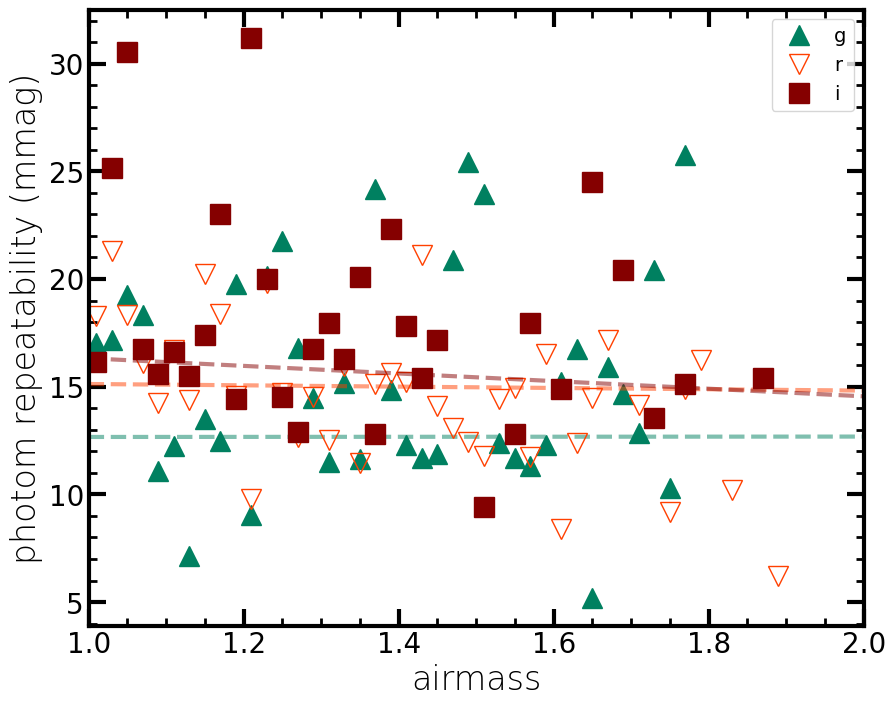

In [28]:
plt.style.use('tableau-colorblind10')
params = {'axes.labelsize': 24,
          'font.size': 20,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [10, 8],
          'figure.facecolor': 'White'}
plt.rcParams.update(params)

i = 0

# for filt in plot_filter_labels[1:]:  # all but u-band
for filt in plot_filter_labels[1:-2]:  # gri only
    if i%2:
        plt.plot(bin_cens, 1000.0*np.array(airmass_mag_std[filt]),
                 plot_filter_symbols[filt], ms=15, fillstyle='none',
                 color=plot_filter_colors[filt], label=filt)
    else:
        plt.plot(bin_cens, 1000.0*np.array(airmass_mag_std[filt]),
                 plot_filter_symbols[filt], ms=15,
                 color=plot_filter_colors[filt], label=filt)

    tmpfit = (np.array(airmass_mag_std[filt]) > 0)
    X = bin_cens[tmpfit]
    Y = 1000.0*np.array(airmass_mag_std[filt])[tmpfit]
    
    # lr = linear_model.LinearRegression()
    # lr.fit(X.reshape(-1, 1), Y)

    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X.reshape(-1, 1), Y)
    # inlier_mask = ransac.inlier_mask_
    # outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(1, 2.3)[:, np.newaxis]
    # line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)
    # plt.plot(line_X, line_y, color=plot_filter_colors[filt], linestyle=':')
    plt.plot(line_X, line_y_ransac, color=plot_filter_colors[filt], linestyle='--', alpha=0.5)

    i += 1

plt.xlabel('airmass')
plt.ylabel('photom repeatability (mmag)')
plt.legend()
plt.minorticks_on()
plt.xlim(1.0, 2.0)
# plt.ylim(0, 63)
plt.savefig('photrep_vs_airmass_tract'+str(mytract)+'.png')
plt.show()

## Now the same, but binned with seeing:

In [29]:
binsize_seeing = 0.02
bins_seeing = np.arange(0.2, 3.0, binsize_seeing)
bin_cens_seeing = np.array(bins_seeing)+binsize_seeing/2
seeing_mag_std = {}
seeing_mag_count = {}

for band in ['g', 'r', 'i', 'z', 'y']:
    pick_band = joined_ccdinfo['band_x'] == band
    stars_band = joined_ccdinfo[pick_band]
    # Subtract off the mean magnitude for each group, and create a new column:
    stars_band_tmp = stars_band.copy()
    stars_band_tmp['psfmag_norm'] = stars_band_tmp.groupby('obj_index')['psfmag'].transform(lambda x: x - x.mean())

    tmp_mag_std = []
    tmp_mag_count = []
    
    for binmin in bins_seeing:
        pick_tmp = (stars_band_tmp.seeing > binmin) & (stars_band_tmp.seeing <= binmin+binsize_seeing)
        stars_tmp = stars_band_tmp[pick_tmp].groupby('obj_index')
        tmp_mag_std.append(np.nanmedian(stars_tmp.psfmag_norm.aggregate('std')))
        tmp_mag_count.append(np.sum(stars_tmp.psfmag_norm.aggregate('count')))
    
    seeing_mag_std[band] = tmp_mag_std
    seeing_mag_count[band] = tmp_mag_count


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0

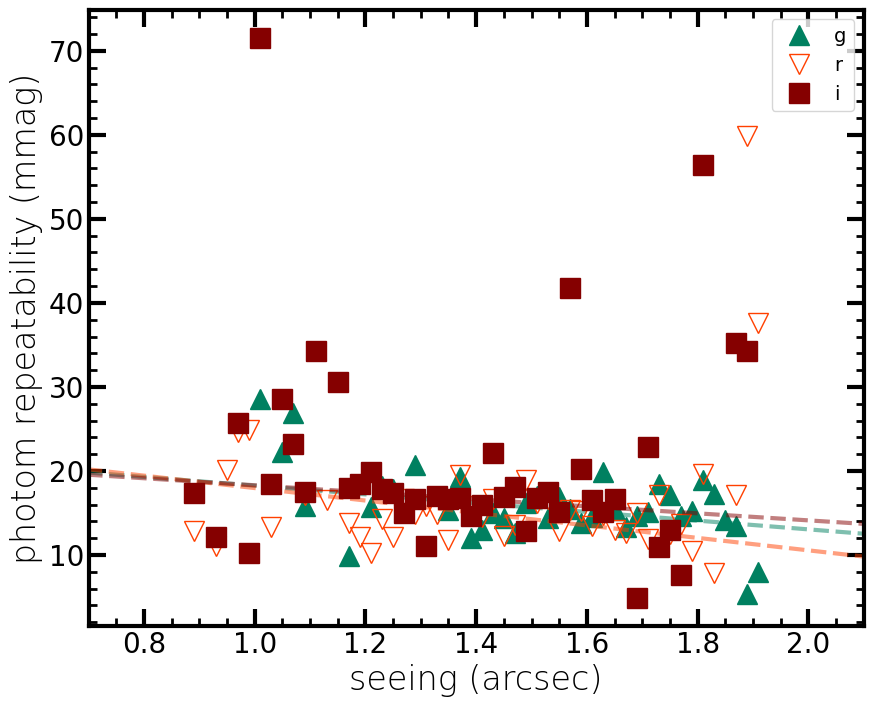

In [30]:
plt.style.use('tableau-colorblind10')
params = {'axes.labelsize': 24,
          'font.size': 20,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [10, 8],
          'figure.facecolor': 'White'}
plt.rcParams.update(params)

i = 0

# for filt in plot_filter_labels[1:]:  # all but u-band
for filt in plot_filter_labels[1:-2]:  # gri only
    if i%2:
        plt.plot(bin_cens_seeing, 1000.0*np.array(seeing_mag_std[filt]),
                 plot_filter_symbols[filt], ms=15, fillstyle='none',
                 color=plot_filter_colors[filt], label=filt)
    else:
        plt.plot(bin_cens_seeing, 1000.0*np.array(seeing_mag_std[filt]),
                 plot_filter_symbols[filt], ms=15,
                 color=plot_filter_colors[filt], label=filt)

    tmpfit = (np.array(seeing_mag_std[filt]) > 0)
    X = bin_cens_seeing[tmpfit]
    Y = 1000.0*np.array(seeing_mag_std[filt])[tmpfit]
    
    # lr = linear_model.LinearRegression()
    # lr.fit(X.reshape(-1, 1), Y)

    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X.reshape(-1, 1), Y)
    # inlier_mask = ransac.inlier_mask_
    # outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(0.2, 3.1)[:, np.newaxis]
    # line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)
    # plt.plot(line_X, line_y, color=plot_filter_colors[filt], linestyle=':')
    plt.plot(line_X, line_y_ransac, color=plot_filter_colors[filt], linestyle='--', alpha=0.5)

    i += 1

plt.xlabel('seeing (arcsec)')
plt.ylabel('photom repeatability (mmag)')
plt.legend()
plt.minorticks_on()
plt.xlim(0.7, 2.1)
# plt.ylim(0, 58)
plt.savefig('photrep_vs_seeing_tract'+str(mytract)+'.png')
plt.show()